In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/README.md
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person1650_virus_2852.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person22_virus_55.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person79_virus_148.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person29_virus_64.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person75_virus_136.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person16_virus_47.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person23_virus_56.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person3_virus_17.jpeg
/kaggle/input/pneumonia-covid-19-xray-dataset/Xray images dataset/Dataset/2/person1_virus_11.jpeg
/kaggle/input/pneumonia-covid

In [2]:
train_norm = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL"
train_pneu = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"
val_norm = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL"
val_pneu = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA"
test_norm = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL"
test_pneu = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA"

In [3]:


from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
infected_images = []
for file in os.listdir(train_pneu):
    img = Image.open(os.path.join(train_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    infected_images.append(img)


In [5]:
for file in os.listdir(val_pneu):
    img = Image.open(os.path.join(val_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    infected_images.append(img)

In [6]:
print(len(infected_images))

3883


In [7]:
normal_images = []
for file in os.listdir(train_norm):
    img = Image.open(os.path.join(train_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    normal_images.append(img)

In [8]:
for file in os.listdir(val_norm):
    img = Image.open(os.path.join(val_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    normal_images.append(img)

In [9]:
print(len(normal_images))

1349


In [10]:
X_train = np.asarray(infected_images + normal_images)
y_train = np.asarray([1 for _ in range(len(infected_images))] + [0 for _ in range(len(normal_images))])

In [11]:
print(X_train.shape)
print(y_train.shape)

X_train = X_train.reshape((5232, 36, 36,1))
print(X_train.shape)
print(y_train.shape)

(5232, 36, 36)
(5232,)
(5232, 36, 36, 1)
(5232,)


In [12]:
test_infected_images = []
for file in os.listdir(test_pneu):
    img = Image.open(os.path.join(test_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    test_infected_images.append(img)

In [13]:
test_normal_images = []
for file in os.listdir(test_norm):
    img = Image.open(os.path.join(test_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    test_normal_images.append(img)

In [14]:
X_test = np.asarray(test_infected_images + test_normal_images)
y_test = np.asarray([1 for _ in range(len(test_infected_images))] + [0 for _ in range(len(test_normal_images))])

In [15]:
print(X_test.shape)
print(y_test.shape)

X_test = X_test.reshape((624, 36, 36,1))
print(X_test.shape)
print(y_test.shape)

(624, 36, 36)
(624,)
(624, 36, 36, 1)
(624,)


In [16]:
X = np.asarray(infected_images + test_infected_images + normal_images + test_normal_images)
y = np.asarray([1 for _ in range(len(infected_images)+len(test_infected_images))] + [0 for _ in range(len(test_normal_images)+len(normal_images))])

In [17]:
print(X.shape)
print(y.shape)
X = X.reshape((5856, 36, 36, 1))
print(X.shape)
print(y.shape)

(5856, 36, 36)
(5856,)
(5856, 36, 36, 1)
(5856,)


In [18]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = 2)

2024-07-09 18:03:05.590951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 18:03:05.591059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 18:03:05.723235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)
X = X / 255.0

[1. 0.]


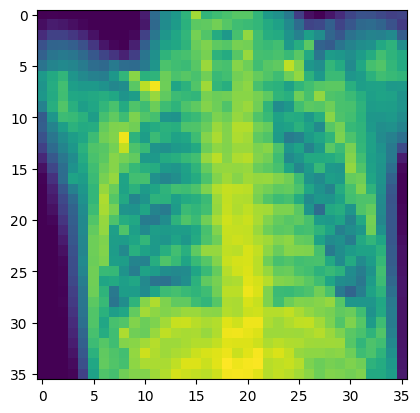

[0. 1.]


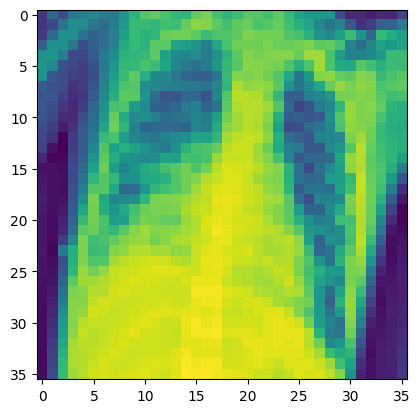

[0. 1.]


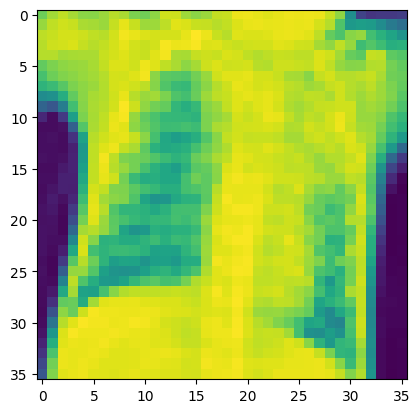

[1. 0.]


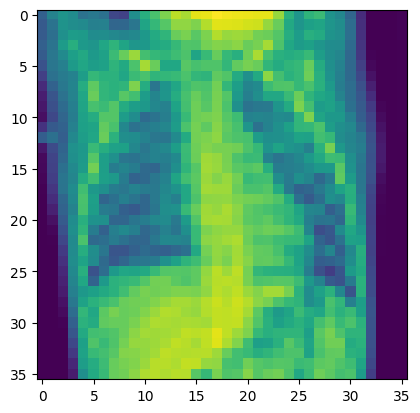

[0. 1.]


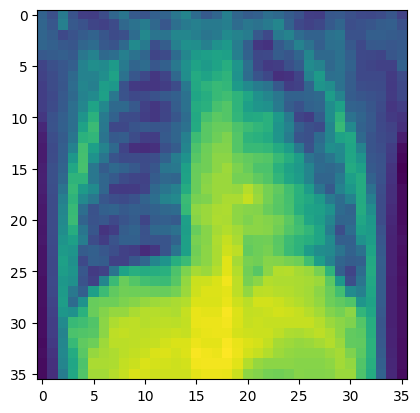

[0. 1.]


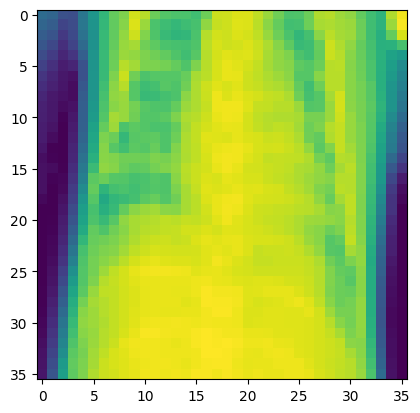

[0. 1.]


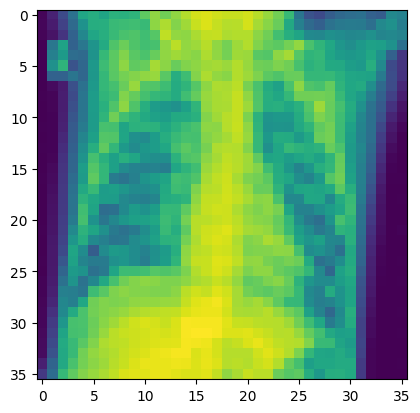

[0. 1.]


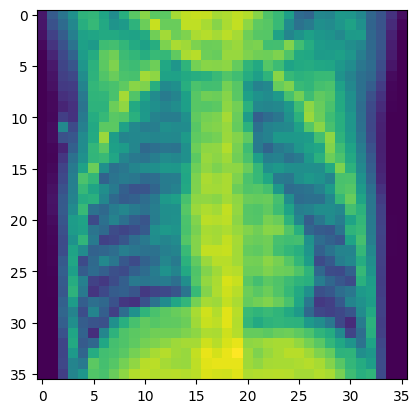

[0. 1.]


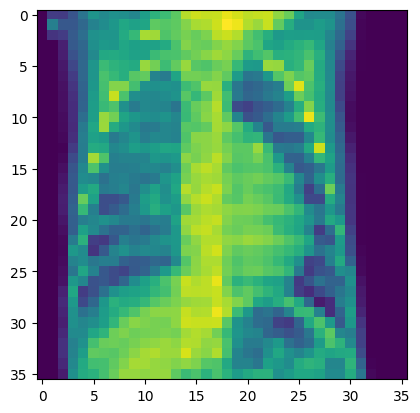

[1. 0.]


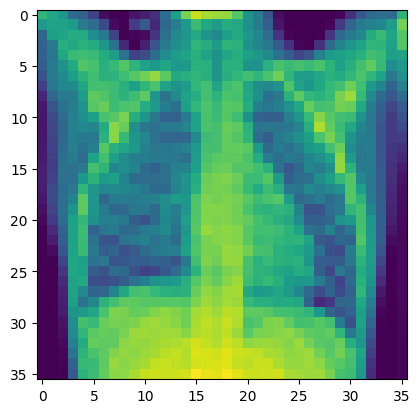

In [20]:
for i in range(10):
    print(y[i])
    plt.imshow(X[i].reshape((36, 36)))
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (4684, 36, 36, 1) (4684, 2)
Test size: (1172, 36, 36, 1) (1172, 2)


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D


In [23]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/15
 27/147 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7708 - loss: 0.7497

I0000 00:00:1720548209.625631     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720548209.645897     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8586 - loss: 0.4248

W0000 00:00:1720548217.557452     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720548218.198988     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8589 - loss: 0.4240 - val_accuracy: 0.7295 - val_loss: 1.3462
Epoch 2/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9235 - loss: 0.2024 - val_accuracy: 0.7850 - val_loss: 0.5249
Epoch 3/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9356 - loss: 0.1621 - val_accuracy: 0.7372 - val_loss: 1.1028
Epoch 4/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9479 - loss: 0.1360 - val_accuracy: 0.7381 - val_loss: 1.7500
Epoch 5/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9623 - loss: 0.1040 - val_accuracy: 0.9548 - val_loss: 0.1247
Epoch 6/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9575 - loss: 0.1065 - val_accuracy: 0.8174 - val_loss: 0.8353
Epoch 7/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9645 - loss: 0.0944 - val_accuracy: 0.5887 - val_loss: 1.2851
Epoch 8/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9653 - loss: 0.0921 - val_accuracy: 0.7304 - va

In [26]:
pred = [np.argmax(i) for i in model.predict(X_test)]
pred[:5]

35/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

W0000 00:00:1720548230.078164     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[1, 1, 1, 0, 1]

In [27]:
tru = [np.argmax(i) for i in y_test]
from sklearn.metrics import confusion_matrix
confusion_matrix(tru, pred)

array([[303,  14],
       [ 55, 800]])

In [28]:
#use this for external prediction
#model.save('pneumonia2.h5')
image='/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg'
from keras_preprocessing import image
test_image = image.load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg',target_size=(36,36))
test_image = test_image.convert('L')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

                

ModuleNotFoundError: No module named 'keras_preprocessing'

In [29]:
print(result)
pred = np.argmax(result[0])
print(pred)

NameError: name 'result' is not defined

In [30]:
model.save('pneumonia2.h5')

In [ ]:
#test_image = test_image.resize((36,36))
#test_image = np.asarray(test_image)
#test_image = test_image.reshape((1,36,36,1))
#test_image = test_image / 255.0
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
pred = np.argmax(model.predict(test_image)[0])
pred